# German Credit Data

Os empréstimos fazem parte das operações bancárias. No entanto, nem todos os empréstimos são prontamente devolvidos e, portanto, é importante que um banco monitore de perto seus pedidos de empréstimo. Este projeto é uma análise dos dados de crédito alemão. Ele contém detalhes de 1.000 solicitantes de empréstimo com 20 atributos e a classificação se um solicitante é considerado um risco de crédito Bom ou Ruim.

Neste projeto, a relação entre o risco de crédito e vários atributos será explorada por meio de técnicas estatísticas básicas e apresentada por meio de visualizações.

# 1. Importando as bibliotecas necessárias e o dataset

Vamos começar baixando os dados do repositório UCI Machine Learning
(https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data).

In [ ]:
# Importando as bibliotecas necessárias e o dataset
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from urllib.request import urlretrieve
urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', 'german.data')
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', \
                  delimiter = ' ', header = None)

# 2. Preparação e Limpeza dos Dados

Vamos ter uma visão geral do conjunto de dados:

In [ ]:
df.info()
print("Algum NaN ou None no DataFrame:", df.isna().any().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB
Algum NaN ou 

In [ ]:
grouped_by_dtype = df.dtypes.groupby(df.dtypes)
grouped_by_dtype.size()

,0
int64,8
object,13


O conjunto de dados contém 21 variáveis e 1000 observações. 8 variáveis são do tipo numérico e 13 do tipo objeto. Como as variáveis do tipo objeto não possuem nenhum valor nulo, podemos concluir que elas são do tipo categórico.

Em seguida, vamos rotular as variáveis para facilitar o uso. O documento que descreve o conjunto de dados pode ser consultado para isso:

In [ ]:
urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc', 'german.doc')
f = open('german.doc')
german_doc = f.read()
print(german_doc)

Description of the German credit dataset.

1. Title: German Credit data

2. Source Information

Professor Dr. Hans Hofmann  
Institut f"ur Statistik und "Okonometrie  
Universit"at Hamburg  
FB Wirtschaftswissenschaften  
Von-Melle-Park 5    
2000 Hamburg 13 

3. Number of Instances:  1000

Two datasets are provided.  the original dataset, in the form provided
by Prof. Hofmann, contains categorical/symbolic attributes and
is in the file "german.data".   
 
For algorithms that need numerical attributes, Strathclyde University 
produced the file "german.data-numeric".  This file has been edited 
and several indicator variables added to make it suitable for 
algorithms which cannot cope with categorical variables.   Several
attributes that are ordered categorical (such as attribute 17) have
been coded as integer.    This was the form used by StatLog.


6. Number of Attributes german: 20 (7 numerical, 13 categorical)
   Number of Attributes german.numer: 24 (24 numerical)


7.  Attribute d

***Com base na descrição, nomeamos as colunas.***

In [ ]:
df.columns = ["montante", "duracao", "historico_credito",
              "proposito", "montante_credito", "poupanca",
              "tempo_empregado","taxa_parcelamento",
              "estado_civil_sexo","tipo_participacao_credito",
              "tempo_moradia", "propriedade","idade",
              "gastos_adicionais", "habitacao","quantidade_creditos","emprego",
              "dependentes","telefone","trabalhador_estrangeiro","risco"]


# Descrição dos códigos:
'''
codigos_historico_de_creditos = {
    "A30": "no credits taken/all credits paid back duly",
    "A31": "all credits at this bank paid back duly",
    "A32": "existing credits paid back duly till now",
    "A33": "delay in paying off in the past",
    "A34": "critical account/other credits existing (not at this bank)"
}

codigos_proposito = {
    "A40": "car(new)",
    "A41": "car(used)",
    "A42": "furniture/equipment",
    "A43": "radio/television",
    "A44": "domestic appliances",
    "A45": "repairs",
    "A46": "education",
    "A47": "vacation",
    "A48": "retraining",
    "A49": "business",
    "A410": "others"
}

codigo_estado_civil_sexo = {
    "A91": "male : divorced/separated",
    "A92": "female : divorced/separated/married",
    "A93": "male : single",
    "A94": "male : married/windowed",
    "A95": "female : single"
}

codigos_outros_devedores = {
    "A101": None,
    "A102": "co-applicant",
    "A103": "guarantor",
}

codigos_propriedade = {
    "A121": "real state",
    "A122": "building society/life insurance",
    "A123": "car",
    "A124": "unknown/no property"
}

codigos_planos_de_parcelamento = {
    "A141": "bank",
    "A142": "stores",
    "A143": "None"
}

codigos_residencia = {
    "A151": "rent",
    "A152": "own",
    "A153": "for free"
}

codigos_estado_emprego = {
    "A171": "unemployed/unskilled-non-resident",
    "A172": "unskilled-resident",
    "A173": "skilled employee/official",
    "A174": "management/self-employed/highly qualified employee/officer"
}

codigos_telefone = {
    "A191": None,
    "A192": "yes"
}

codigos_trabalhador_estrangeiro = {
    "A201": "yes",
    "A202": "no"
}

codigos_status_atual_conta_corrente = {
    "A11": "< 0",
    "A12": "< 199",
    "A13": ">= 200",
    "A14": None
}

codigos_reserva_poupanca = {
    "A61": "< 100",
    "A62": "< 499",
    "A63": "< 999",
    "A64": ">= 1000",
    "A65": "unknown"
}

codigos_tempo_emprego = {
    "A71": None,
    "A72": "< 1", # Menos de 1 ano
    "A73": "< 4", # Entre 1 ano e menos que 4 anos
    "A74": "< 7", # Entre 4 anos e menos que 7 anos
    "A75": ">= 7" # Mais de 7 anos
}
'''

df = df.replace(['A11','A12','A13','A14', 'A171','A172','A173','A174','A121','A122','A123','A124'],
                  ['neg_bal','positive_bal','positive_bal','no_acc','unskilled','unskilled','skilled','highly_skilled',
                   'none','car','life_insurance','real_estate'])
df.head()

,montante,duracao,historico_credito,proposito,montante_credito,poupanca,tempo_empregado,taxa_parcelamento,estado_civil_sexo,tipo_participacao_credito,...,propriedade,idade,gastos_adicionais,habitacao,quantidade_creditos,emprego,dependentes,telefone,trabalhador_estrangeiro,risco
0,neg_bal,6,A34,A43,1169,A65,A75,4,A93,A101,...,none,67,A143,A152,2,skilled,1,A192,A201,1
1,positive_bal,48,A32,A43,5951,A61,A73,2,A92,A101,...,none,22,A143,A152,1,skilled,1,A191,A201,2
2,no_acc,12,A34,A46,2096,A61,A74,2,A93,A101,...,none,49,A143,A152,1,unskilled,2,A191,A201,1
3,neg_bal,42,A32,A42,7882,A61,A74,2,A93,A103,...,car,45,A143,A153,1,skilled,2,A191,A201,1
4,neg_bal,24,A33,A40,4870,A61,A73,3,A93,A101,...,real_estate,53,A143,A153,2,skilled,2,A191,A201,2


# 3. Análise e visualização dos dados

Analisando a coluna Montante

In [ ]:
montante_vet = df.loc[:, 'montante'].value_counts()
montante_vet

,count
montante,
no_acc,394
positive_bal,332
neg_bal,274


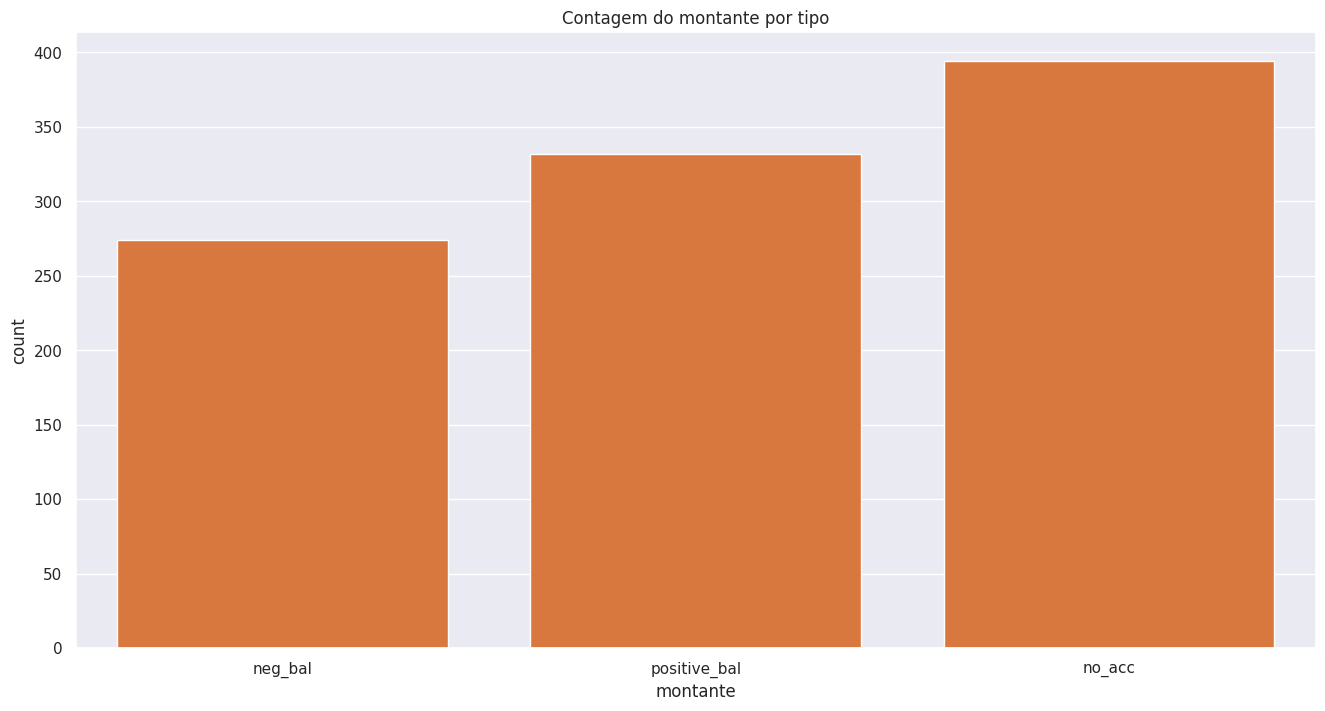

<Figure size 640x480 with 0 Axes>

In [ ]:
# Estilizando plotagem
plt.rcParams.update({'text.color': "white"})
sns.set_theme()

fig, ax = plt.subplots(figsize = (16, 8))
a = sns.countplot(x = df.loc[:,'montante'], data = df, color='#f37124')
a.set_title("Contagem do montante por tipo")
plt.show()
plt.savefig('montante_p_tipo')

***Análise de correlação entre as variáveis do dataset:***

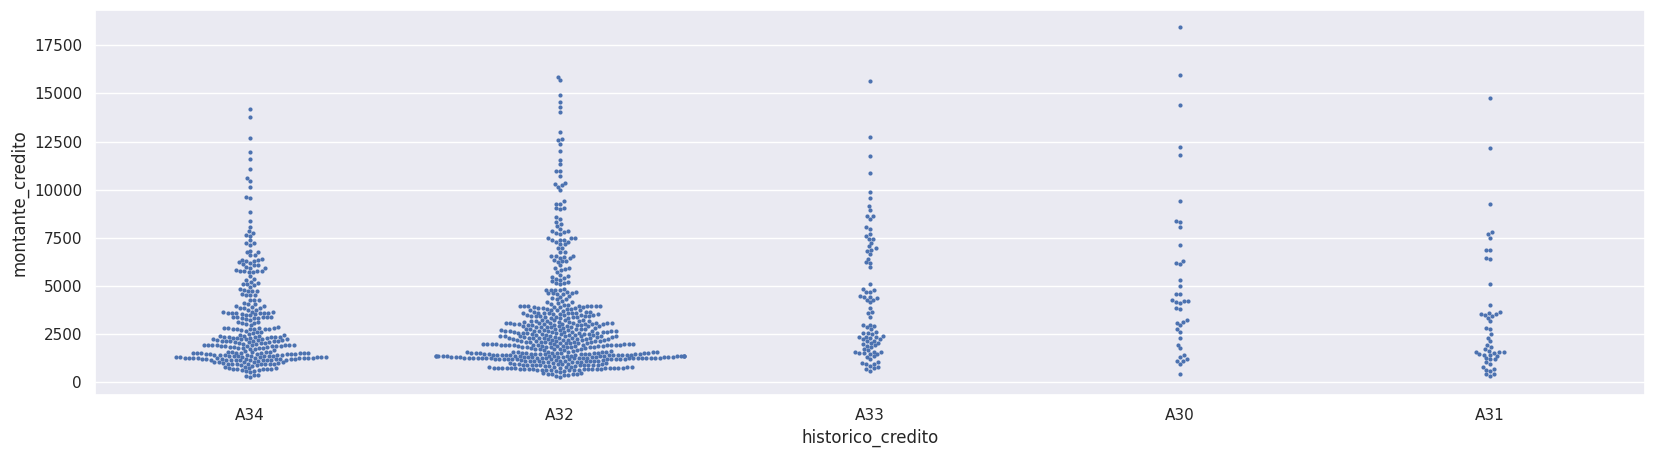

In [ ]:
plt.figure(figsize=(20, 5))
sns.swarmplot(x="historico_credito", y="montante_credito", data=df, size=3)
plt.show()



#codigos_historico_de_creditos = {
#   "A30": "no credits taken/all credits paid back duly",
#   "A31": "all credits at this bank paid back duly",
#   "A32": "existing credits paid back duly till now",
#   "A33": "delay in paying off in the past",
#   "A34": "critical account/other credits existing (not at this bank)"
#}

***Examinando a distribuição da coluna de risco:***

In [ ]:
df.risco.unique()

array([1, 2])

 A coluna risco tem dois valores:

1 = representando um bom empréstimo.

2 = representando um mau empréstimo (default).

A convenção usual é usar '1' para empréstimos ruins e '0' para empréstimos bons. Vamos substituir os valores para cumprir a convenção.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df.risco)
df.risco = le.transform(df.risco)
df.risco.head(5)

,risco
0,0
1,1
2,0
3,0
4,1


Uma compreensão da porcentagem de empréstimos bons e ruins seria útil para uma análise mais aprofundada. Um gráfico de pizza seria a melhor ferramenta para ajudar com isso.

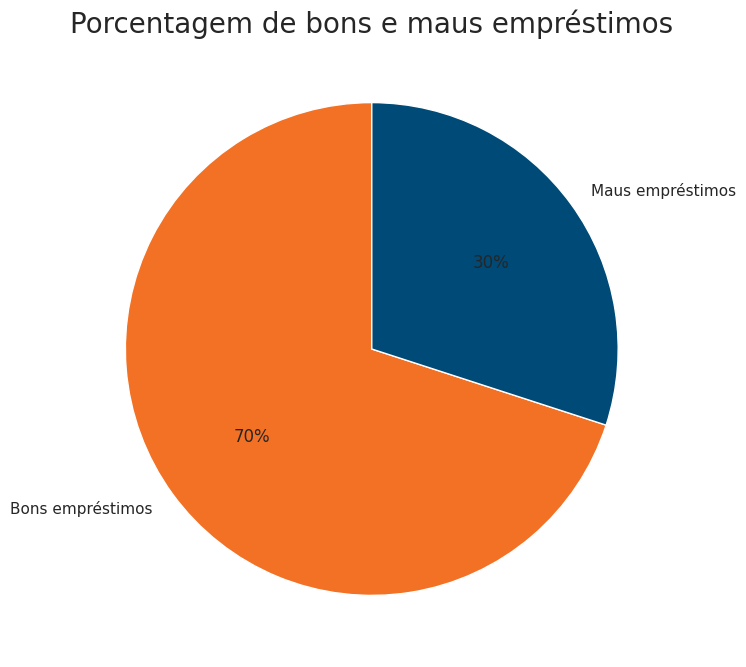

In [ ]:
fig, ax = plt.subplots(figsize = (16, 8))
good_bad_per = round(((df.risco.value_counts() / df.risco.count()) * 100))
good_bad_per
plt.pie(good_bad_per, labels = ['Bons empréstimos', 'Maus empréstimos'], colors= ['#f37124','#004a77'], autopct = '%1.0f%%', startangle = 90)
plt.title('Porcentagem de bons e maus empréstimos', fontsize = 20)
plt.show()

O gráfico de pizza mostra que 30% dos solicitantes de empréstimos ficaram inadimplentes. A partir dessas informações, vemos que este é um problema de classe desequilibrado. Portanto, teremos que pesar as classes por sua representação nos dados para refletir esse desequilíbrio.

 ***Exploração das variáveis contínuas:***

Utilizaremos:

1. Estatísticas resumidas.
2. Histogramas.
3. Box-plots.

Observações: Uma olhada na distribuição das variáveis contínuas mostra que as variáveis estão em intervalos diferentes. O histograma sugere que a maioria das observações cai no primeiro quantil da variável. Isso pode ser verificado pelo box-plot. Os box-plots mostram que a maioria dos valores dos créditos estão entre 1000 a 4500 dólares. O valor do crédito é positivamente enviesado. A maior parte da duração do empréstimo é de 15 a 30 meses. A maioria dos requerentes de empréstimo tem idade entre 28 e 43 anos.

In [ ]:
df[['montante_credito','duracao','idade']].describe()

,montante_credito,duracao,idade
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,20.903000,35.546000
std,2822.736876,12.058814,11.375469
min,250.000000,4.000000,19.000000
25%,1365.500000,12.000000,27.000000
50%,2319.500000,18.000000,33.000000
75%,3972.250000,24.000000,42.000000
max,18424.000000,72.000000,75.000000


In [ ]:
df['montante_credito'] = np.log(df['montante_credito'])
df[['montante_credito','duracao','idade']].describe()

,montante_credito,duracao,idade
count,1000.000000,1000.000000,1000.000000
mean,7.788691,20.903000,35.546000
std,0.776474,12.058814,11.375469
min,5.521461,4.000000,19.000000
25%,7.219276,12.000000,27.000000
50%,7.749107,18.000000,33.000000
75%,8.287088,24.000000,42.000000
max,9.821409,72.000000,75.000000


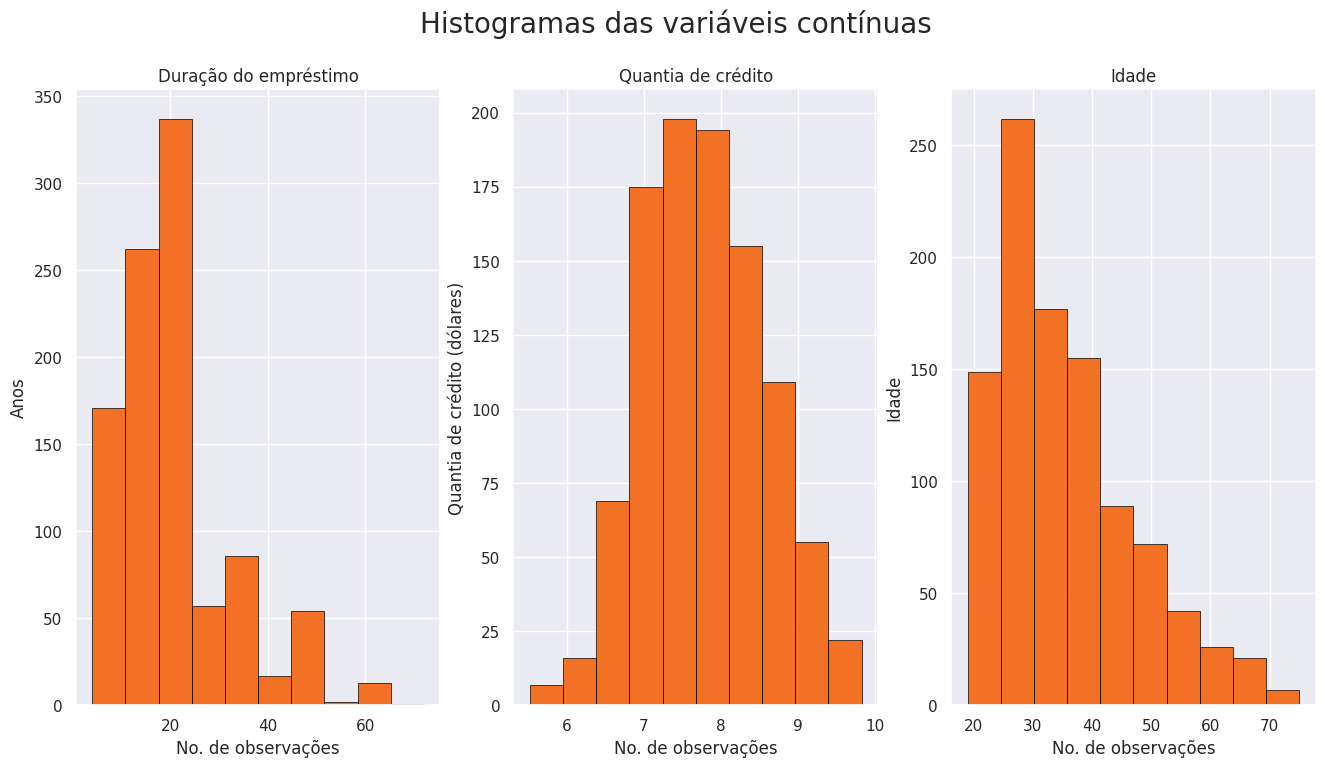

In [ ]:
# Estilizando plotagem
plt.rcParams.update({'text.color': "white"})
sns.set_theme()

fig, axes = plt.subplots(1, 3, figsize = (16, 8))
plt.suptitle('Histogramas das variáveis contínuas', fontsize = 20)
axes[0].hist(df['duracao'], facecolor = '#f37124', edgecolor = 'black', linewidth = 0.5)
axes[0].set_xlabel('No. de observações')
axes[0].set_ylabel('Anos')
axes[0].set_title('Duração do empréstimo');

axes[1].hist(df['montante_credito'], facecolor = '#f37124', edgecolor = 'black', linewidth = 0.5)
axes[1].set_xlabel('No. de observações')
axes[1].set_ylabel('Quantia de crédito (dólares)')
axes[1].set_title('Quantia de crédito');

axes[2].hist(df['idade'], facecolor = '#f37124', edgecolor = 'black', linewidth = 0.5)
axes[2].set_xlabel('No. de observações')
axes[2].set_ylabel('Idade')
axes[2].set_title('Idade');

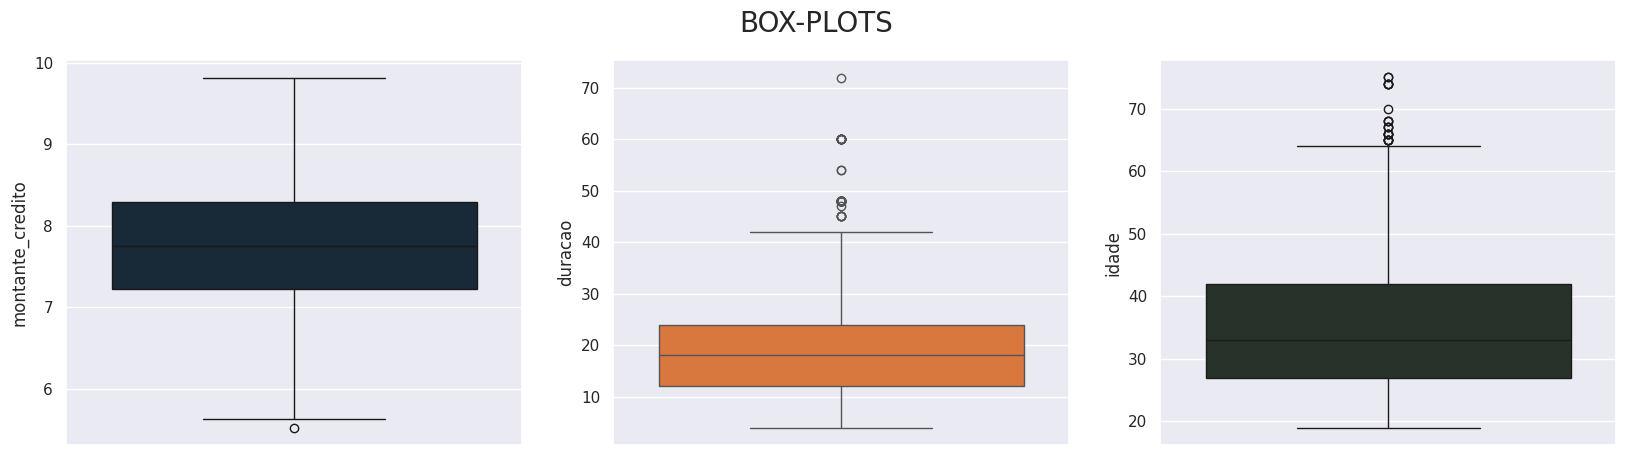

In [ ]:
# Box-plots das variáveis contínuas
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.suptitle('BOX-PLOTS', fontsize = 20)
sns.boxplot(df['montante_credito'], ax=ax[0],color = '#13293d');
sns.boxplot(df['duracao'], ax = ax[1], color = '#f37124');
sns.boxplot(df['idade'], ax = ax[2], color = '#253529');
plt.show()

***Relação entre o valor do crédito e a duração do reembolso:***

Utilizaremos:

1. Gráfico de dispersão.
Observações:

O gráfico de dispersão mostra que, em geral, empréstimos maiores têm maior duração de reembolso. Casos em que grandes empréstimos são concedidos com curto prazo de reembolso acabaram por ser maus empréstimos.

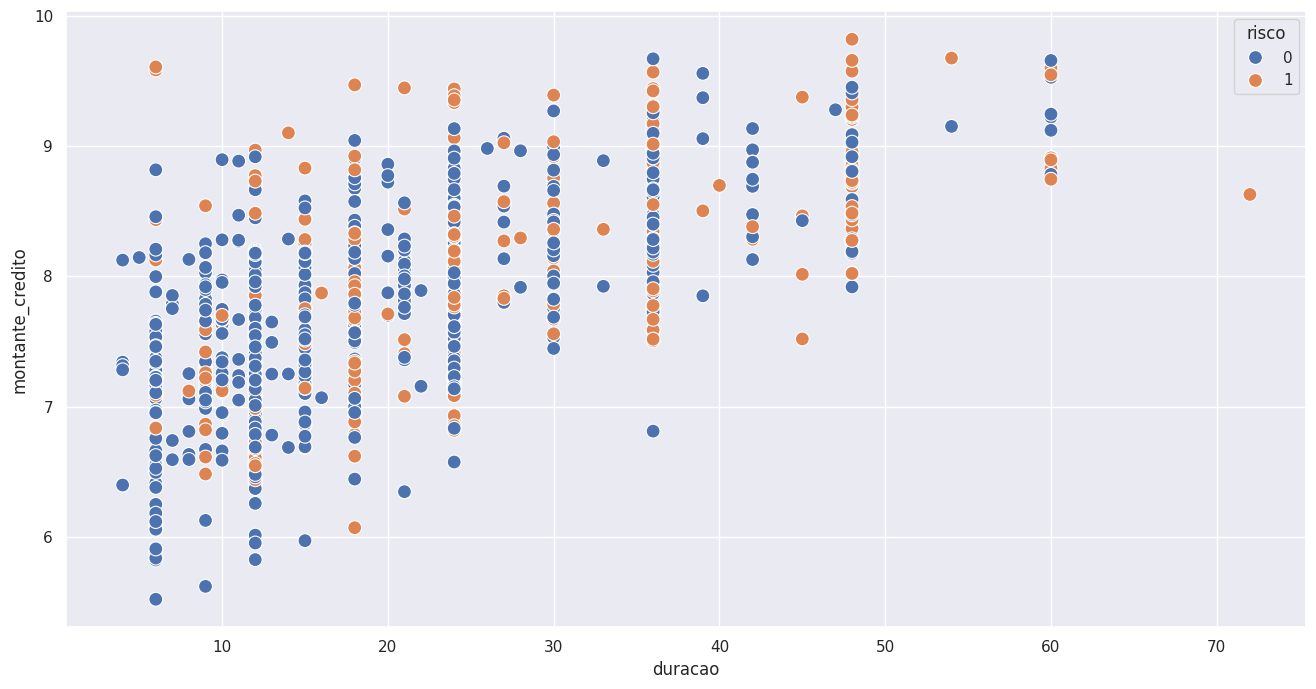

In [ ]:
sns.set(rc = {'figure.figsize':(16, 8)})
sns.scatterplot(y = df.montante_credito,
                x = df.duracao, color = ['#13293d', '#f37124'],
                hue = df.risco,
                s = 100,
                )

plt.show()

***Exploração de variáveis categóricas:***

 ***Relação entre risco de crédito e habilidades do solicitante do empréstimo:***

Utilizaremos:

1. Gráfico de barras
Observações:

O gráfico mostra que os candidatos desempregados/não qualificados representam um alto risco.

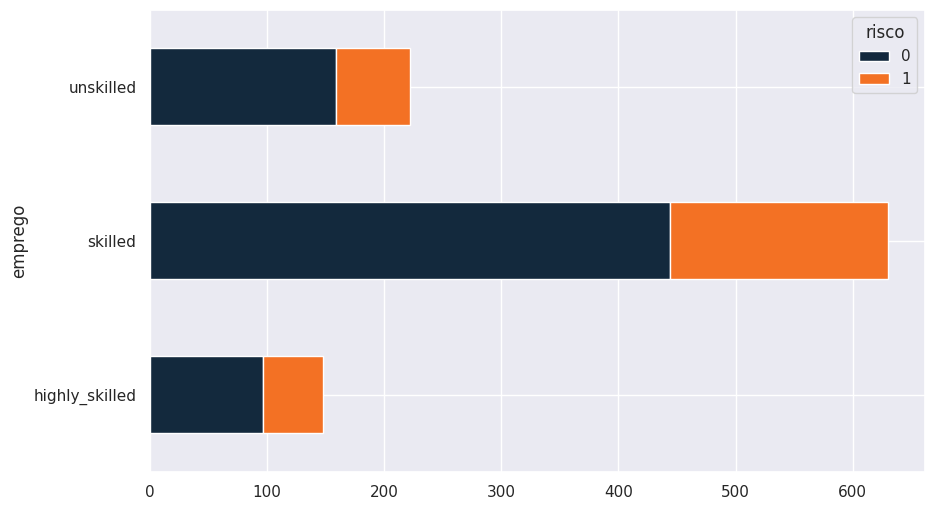

In [ ]:
df.groupby('emprego')['risco'].value_counts().unstack(level = 1).plot.barh(stacked = True, color = ['#13293d', '#f37124'],figsize = (10, 6))
plt.show()

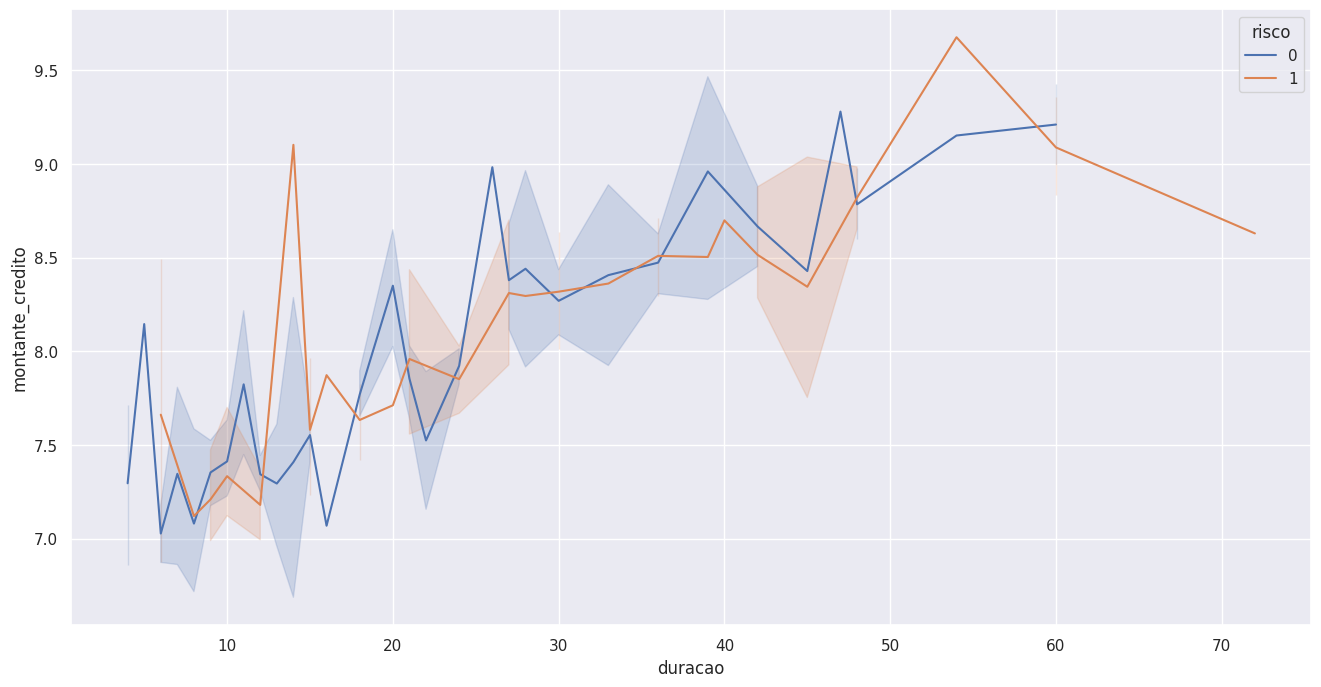

In [ ]:
sns.set(rc = {'figure.figsize':(16, 8)})
sns.lineplot(data = df, x = 'duracao', y = 'montante_credito', hue = 'risco', palette = 'deep',color = ['#13293d', '#f37124']);

***Relação entre o ativo mais valioso do candidato e o valor do crédito, risco de crédito:***

Utilizaremos:

1. Gráfico de barras empilhadas
2. Gráfico de dispersão

A codificação categórica usada nos gráficos é:

A121: imóveis.

A122 : se não A121 : convênio de poupança/seguro de vida.

A123 : se não A121/A122 : carro ou outro, não no atributo 6.

A124: desconhecido/sem propriedade.

Observações:

Os gráficos mostram que as pessoas com ativos imobiliários são muito arriscadas.

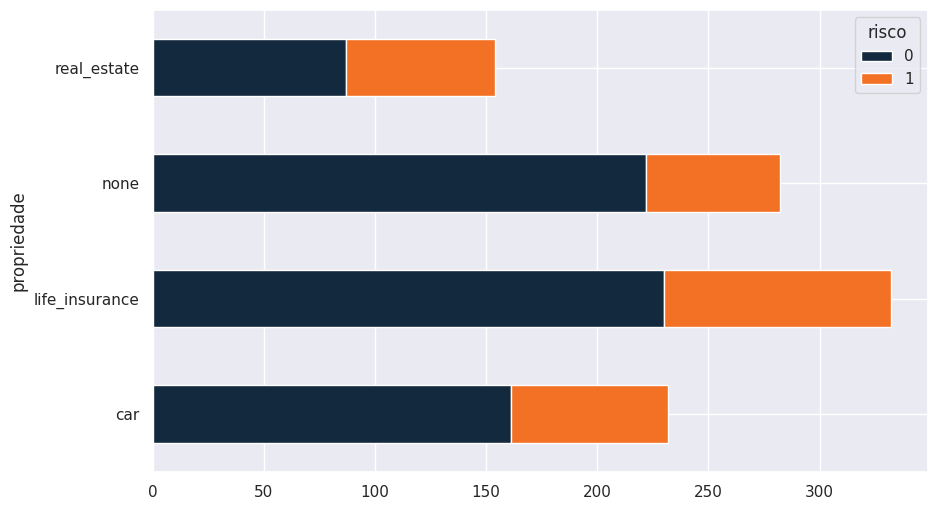

In [ ]:
df.groupby('propriedade')['risco'].value_counts().unstack(level = 1).plot.barh(stacked = True, figsize = (10, 6),color = ['#13293d', '#f37124'])
plt.show()


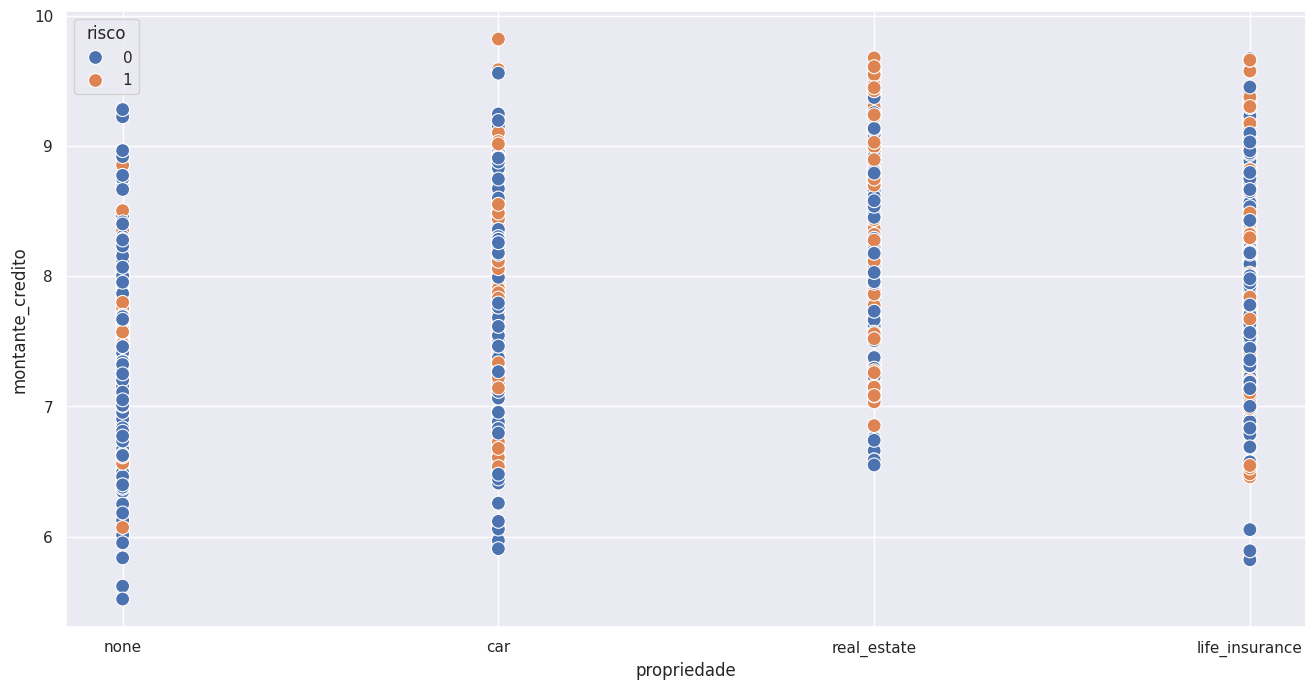

In [ ]:
sns.set(rc = {'figure.figsize':(16, 8)})
sns.scatterplot(y = df.montante_credito, color = ['#13293d', '#f37124'],
                x = df.propriedade,
                hue = df.risco,
                s = 100,
                );
plt.show()

# 4. Codificar variáveis categóricas

A maioria dos modelos de aprendizado de máquina não pode lidar com variáveis categóricas. Portanto, precisamos codificar as 13 variáveis categóricas que temos no conjunto de dados alemão.

In [ ]:
# Número de classes únicas em cada coluna de objeto
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

,0
montante,3
historico_credito,5
proposito,10
poupanca,5
tempo_empregado,5
estado_civil_sexo,4
tipo_participacao_credito,3
propriedade,4
gastos_adicionais,3
habitacao,3


Temos variáveis categóricas com 2 a 10 categorias. Vamos para a codificação de rótulo para variáveis com apenas duas categorias, enquanto para variáveis com mais de duas categorias, vamos para a codificação one-hot. Na codificação de rótulo, atribuímos cada categoria exclusiva em uma variável categórica com um número inteiro. Nenhuma nova coluna é criada. Na codificação one-hot, criamos uma nova coluna para cada categoria exclusiva em uma variável categórica. A única desvantagem da codificação one-hot é que o número de recursos (dimensões dos dados) pode explodir com variáveis categóricas com muitas categorias. Para lidar com isso, podemos executar a codificação one-hot seguida de PCA ou outros métodos de redução de dimensionalidade para reduzir o número de dimensões (enquanto ainda tentamos preservar as informações).

Para codificação de rótulo, usamos o LabelEncoder da biblioteca 'Scikit-Learn' e para codificação one-hot, a função 'get_dummies(df)' da biblioteca 'pandas'.

In [ ]:
# Codificador de rótulo
le = LabelEncoder()
le_count = 0

# Iterando pelas colunas
for col in df:
    if df[col].dtype == 'object':
        # Se 2 ou menos categorias exclusivas
        if len(list(df[col].unique())) <= 2:
            # Treine nos dados de treinamento
            le.fit(df[col])
            # Transforme os dados de treinamento e teste
            df[col] = le.transform(df[col])

            # Acompanhe quantas colunas foram codificadas por rótulo
            le_count += 1

print('%d colunas foram codificadas por rótulo.' % le_count)

2 colunas foram codificadas por rótulo.


In [ ]:
# Codificador One-Hot
df = pd.get_dummies(df)

print('Tamanho dos recursos codificados:', df.shape)

Tamanho dos recursos codificados: (1000, 58)


Agora que codificamos as variáveis, vamos continuar com a análise exploratória dos dados.


***Correlação entre as variáveis:***

Vejamos as correlações entre os recursos e o destino usando o coeficiente de correlação de Pearson. Neste caso, uma correlação positiva representa a correlação com a inadimplência de crédito, enquanto uma correlação negativa representa a correlação com o reembolso do crédito.

Observações:


***Correlação positiva:***

Pessoas com contas correntes com saldo negativo (account_bal_A11) provavelmente deixarão de pagar o empréstimo.

Empréstimos de maior duração (duration) tendem a ficar inadimplentes.


***Correlação negativa:***

Pessoas sem conta corrente (account_bal_A14) provavelmente pagarão o empréstimo.

In [ ]:
# Encontre correlações com o 'target' e ordene
correlations = df.corr()['risco'].sort_values()

# Display correlations
print('Correlações positivas:')
print(correlations.tail(15))
print('\nCorrelações negativas:')
print(correlations.head(15))

Correlações positivas:
estado_civil_sexo_A92      0.075493
habitacao_A153             0.081556
montante_positive_bal      0.089895
habitacao_A151             0.092785
gastos_adicionais_A141     0.096510
proposito_A40              0.096900
tempo_empregado_A72        0.106397
montante_credito           0.109570
propriedade_real_estate    0.125750
historico_credito_A31      0.134448
historico_credito_A30      0.144767
poupanca_A61               0.161007
duracao                    0.214927
montante_neg_bal           0.258333
risco                      1.000000
Name: risco, dtype: float64

Correlações negativas:
montante_no_acc           -0.322436
historico_credito_A34     -0.181713
habitacao_A152            -0.134589
poupanca_A65              -0.129238
propriedade_none          -0.119300
gastos_adicionais_A143    -0.113285
proposito_A43             -0.106922
proposito_A41             -0.099791
idade                     -0.091127
poupanca_A64              -0.085749
trabalhador_estrangeiro  

***Vejamos o mapa de calor de correlações significativas:***

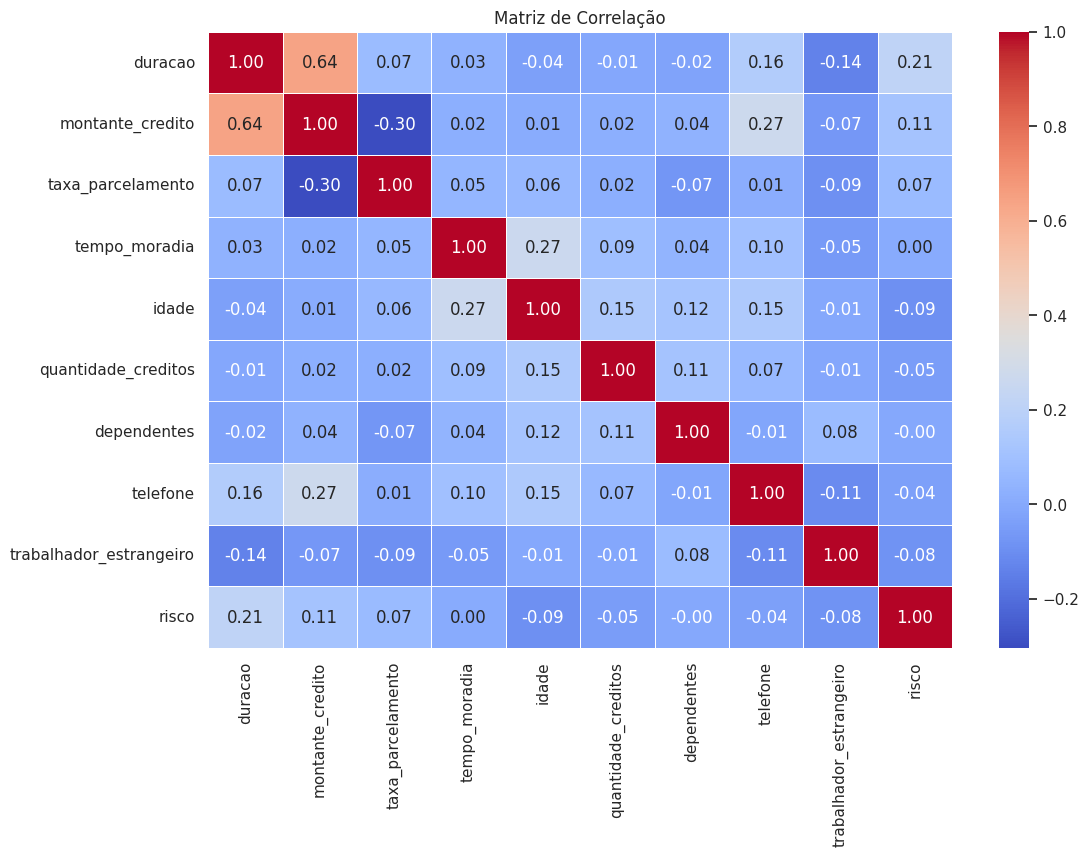

In [ ]:
# Calcular a matriz de correlação entre variáveis numéricas
selected_columns = df.select_dtypes(include=['number']).columns

correlation_matrix = df[selected_columns].corr()

# Plotando o heatmap da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

***Correlações Fortes (|r| > 0.5)***

duracao e montante_credito (0.64):

Há uma correlação moderadamente forte positiva, indicando que empréstimos com prazos mais longos tendem a ter valores maiores.


***Correlações Moderadas (0.3 < |r| ≤ 0.5)***


montante_credito e taxa_parcelamento (-0.30):

Correlação negativa moderada, sugerindo que empréstimos com valores maiores podem ter taxas de parcelamento menores.


montante_credito e telefone (0.27):

Relação positiva moderada, possivelmente indicando que clientes com telefone tendem a solicitar créditos maiores.


***Correlações Fracas (0.1 < |r| ≤ 0.3):***


Várias correlações fracas aparecem, como entre tempo_moradia e idade (0.27) ou duracao e risco (0.21).

In [ ]:
# Retirando a coluna Montante_credito para evitar multicolinearidade
#df.drop(labels = 'montante_credito', axis = 1, inplace = True)

# 5. Engenharia de recursos

A engenharia de recursos refere-se à criação de recursos mais úteis a partir dos dados. Isso representa um dos padrões do aprendizado de máquina: a engenharia de recursos tem um retorno sobre o investimento maior do que a construção de modelos e o ajuste de hiperparâmetros.

A engenharia de recursos refere-se a um processo geral e pode envolver tanto a construção de recursos: adicionar novos recursos a partir dos dados existentes, quanto a seleção de recursos: escolher apenas os recursos mais importantes ou outros métodos de redução de dimensionalidade. Existem muitas técnicas que podemos usar para criar recursos e selecionar recursos.

Para este problema, tentaremos construir características polinomiais.

***Recursos polinomiais:***

Aqui, encontramos interações entre os recursos significativos. A correlação entre os recursos de interação são verificados. Se os recursos de interação tiverem maior correlação com o destino em comparação com os recursos originais, eles serão incluídos no modelo de aprendizado de máquina, pois podem ajudar o modelo a aprender melhor.

In [ ]:
# Criando um novo dataframe para recursos polinomiais
poly_features = df[['duracao','montante_neg_bal','montante_no_acc']]
poly_target = df['risco']

from sklearn.preprocessing import PolynomialFeatures


# Cria o objeto polinomial com grau especificado
poly_transformer = PolynomialFeatures(degree = 2)
# Treinando os recursos polinomiais
poly_transformer.fit(poly_features)

# Transformando os recursos
poly_features = poly_transformer.transform(poly_features)
print('Tamanho dos recursos polinomiais:', poly_features.shape)

Tamanho dos recursos polinomiais: (1000, 10)


Isso cria um número considerável de novos recursos. Para obter os nomes, temos que usar o método get_feature_names de recursos polinomiais.

In [ ]:
poly_transformer.get_feature_names_out(input_features = ['duracao','montante_neg_bal','montante_no_acc'])

array(['1', 'duracao', 'montante_neg_bal', 'montante_no_acc', 'duracao^2',
       'duracao montante_neg_bal', 'duracao montante_no_acc',
       'montante_neg_bal^2', 'montante_neg_bal montante_no_acc',
       'montante_no_acc^2'], dtype=object)

Agora, podemos ver se algum desses novos recursos está correlacionado com o risco:

In [ ]:
# Cria um dataframe para recursos polinomiais
poly_features = pd.DataFrame(
    poly_features, columns = poly_transformer.get_feature_names_out(
        ['duracao','montante_neg_bal','montante_no_acc']))

# Adicionamos o risco
poly_features['risco'] = poly_target

# Encontrando as correlações com o alvo
poly_corrs = poly_features.corr()['risco'].sort_values()

# Exibindo as correlações
poly_corrs

,risco
montante_no_acc,-0.322436
montante_no_acc^2,-0.322436
duracao montante_no_acc,-0.232697
duracao^2,0.200996
duracao,0.214927
montante_neg_bal,0.258333
montante_neg_bal^2,0.258333
duracao montante_neg_bal,0.303343
risco,1.000000
1,NaN


Todas as novas variáveis têm uma correlação maior (em termos de magnitude absoluta) com o risco do que as características originais. Adicionaremos esses recursos a uma cópia do conjunto de dados alemão e avaliaremos modelos com e sem os recursos.

In [ ]:
list(poly_features)

['1',
 'duracao',
 'montante_neg_bal',
 'montante_no_acc',
 'duracao^2',
 'duracao montante_neg_bal',
 'duracao montante_no_acc',
 'montante_neg_bal^2',
 'montante_neg_bal montante_no_acc',
 'montante_no_acc^2',
 'risco']

In [ ]:
# Excluindo colunas duplicadas em poly_features

for i in list(poly_features.columns):
  for j in list(df.columns):
    if (i == j):
      poly_features.drop(labels = i, axis = 1, inplace = True)

poly_features.drop(labels = '1', axis = 1, inplace = True)
list(poly_features)

['duracao^2',
 'duracao montante_neg_bal',
 'duracao montante_no_acc',
 'montante_neg_bal^2',
 'montante_neg_bal montante_no_acc',
 'montante_no_acc^2']

In [ ]:
# Tamanho do dataframe original
print('Tamanho do dataframe original: ', df.shape)

# Mesclar recursos polnomiais no dataframe
german_df_poly = df.merge(poly_features, left_index = True, right_index = True, how = 'left')

# Printando o novo tamanho
print('Tamanho dos recursos polinomiais mesclados: ', german_df_poly.shape)

Tamanho do dataframe original:  (1000, 58)
Tamanho dos recursos polinomiais mesclados:  (1000, 64)


In [ ]:
german_df_poly.isna().any().any()

np.False_

# 6. Divisão dos dados de teste e treino

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

X, y = df.drop('risco', axis = 1), df['risco']
X.shape, y.shape

((1000, 57), (1000,))

In [ ]:
# Supondo que X seja suas características e y seus rótulos (classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicando o SMOTE para balancear os dados

#smote = SMOTE(sampling_strategy='auto', random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Aplicando ADASYN nos dados para balancear
adasyn = ADASYN(sampling_strategy='auto',n_neighbors=3 ,random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [ ]:
X_train_resampled

,duracao,montante_credito,taxa_parcelamento,tempo_moradia,idade,quantidade_creditos,dependentes,telefone,trabalhador_estrangeiro,montante_neg_bal,...,propriedade_real_estate,gastos_adicionais_A141,gastos_adicionais_A142,gastos_adicionais_A143,habitacao_A151,habitacao_A152,habitacao_A153,emprego_highly_skilled,emprego_skilled,emprego_unskilled
0,24,7.616776,4,4,60,2,1,1,0,False,...,True,False,False,True,False,False,True,False,True,False
1,12,7.541152,4,4,39,1,1,1,0,False,...,False,False,False,True,False,True,False,True,False,False
2,30,8.194782,4,4,57,2,1,1,0,True,...,False,False,False,True,True,False,False,False,True,False
3,12,6.864848,2,3,47,2,2,0,0,False,...,False,False,False,True,False,True,False,False,False,True
4,36,8.650149,4,2,38,2,1,1,0,False,...,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,12,6.977890,4,3,29,1,1,0,0,False,...,False,False,False,True,True,True,False,False,True,True
958,17,8.635170,2,4,39,2,1,1,0,False,...,True,True,False,True,False,True,True,True,True,False
959,20,7.102646,2,4,39,1,2,0,0,False,...,True,True,False,True,False,True,False,True,True,False
960,12,7.314899,1,1,24,1,1,0,0,False,...,False,False,False,True,True,True,False,False,True,False


In [ ]:
y_train_resampled

,risco
0,0
1,0
2,0
3,0
4,0
...,...
957,1
958,1
959,1
960,1


# 7. Modelo XGBoost

***Critério de avaliação:***

Vamos dar uma olhada nas diferentes opções disponíveis de classificação:

|Critério de avaliação| Descrição |:---|--- |Acurácia| (Verdadeiro positivo + Verdadeiro negativo) / Total observações |Precisão| Verdadeiro positivo / Total da predição positiva |Recall| Verdadeiro positivo / Total dos atuais positivos |F1 | 2 * Precisão * Recall / (Precisão + Recall) |AUC ROC| Área abaixo da curva ROC (TPR Vs. FPR para todos os limites de classificação)

Acurácia: O conjunto de dados alemão é um conjunto de dados desequilibrado. A acurácia daria uma pontuação alta ao prever a classe majoritária, mas não conseguiria prever a classe minoritária, que são os inadimplentes. Portanto, essa não é uma métrica adequada para esse conjunto de dados.

Precisão: A precisão é uma boa métrica quando os custos de falsos positivos são altos. Exemplo, detecção de spam de e-mail.

Recall: Esta métrica é adequada quando os custos de falsos negativos são altos. Exemplo, prevendo um inadimplente como não inadimplente. Isso custa enorme perda para o banco. Portanto, esta é uma métrica adequada para o nosso caso.

F1: Medida de precisão e recall.

AUC ROC: É o gráfico de TPR vs FPR. Todos os outros critérios discutidos aqui assumem 0,5 como o limite de decisão para a classificação. No entanto, pode não ser sempre verdade. A AUC nos ajuda a avaliar o desempenho do modelo para todos os limites de classificação. Quanto maior o valor da métrica AUC, melhor o modelo.

Taxa de verdadeiro positivo (TPR) = TP / Total real positivo

Taxa de falsos positivos (FPR) = FP / Total real negativo

Usaremos a acurácia e o F1 como critério de métrica.

***Linha de base:***

In [ ]:
y_train_resampled.value_counts(normalize = True)

,proportion
risco,
0,0.510395
1,0.489605


Isso significa que a acurácia da linha de base é de 50%, ou seja, mesmo classificando todas as amostras como inadimplentes, teremos 50% de acurácia.

***Modelo:***

In [ ]:
# Importando o XGBoost regressor
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
"""
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200,500],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'random_state': [42]
}

grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# max_depth, learning_rate, n_estimators, subsample, colsample_bytree, random_state = grid_search.best_params_.values()


print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')

"""

"\nparam_grid = {\n    'max_depth': [3, 4, 5],\n    'learning_rate': [0.01, 0.1, 0.2],\n    'n_estimators': [100, 200,500],\n    'subsample': [0.7, 0.8, 1.0],\n    'colsample_bytree': [0.7, 0.8, 1.0],\n    'random_state': [42]\n}\n\ngrid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)\ngrid_search.fit(X_train_resampled, y_train_resampled)\n\n# max_depth, learning_rate, n_estimators, subsample, colsample_bytree, random_state = grid_search.best_params_.values()\n\n\nprint(f'Best Hyperparameters: {grid_search.best_params_}')\nprint(f'Best Cross-Validation Score: {grid_search.best_score_}')\n\n"

In [ ]:
# Criando o modelo
xgb_model = XGBClassifier(
    max_depth = 3,
    learning_rate = 0.03,
    subsample = 0.8,
    n_estimators = 200,
    random_state = 42,
    colsample_bytree = 0.8,
    gamma = 0.1,
    scale_pos_weight = 1.9
)

***Modelo Utilizando valores balanceados***

In [ ]:
# Treinando o modelo
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_balanceado = xgb_model.predict(X_test)

y_pred_balanceado.shape, y_test.shape

((300,), (300,))

***Modelo Utilizando valores desbalanceados***

In [ ]:
# Treinando o modelo
xgb_model.fit(X_train, y_train)

# Predict
y_pred_desbalanceado = xgb_model.predict(X_test)

y_pred_desbalanceado.shape, y_test.shape

((300,), (300,))

Vamos verificar a acurácia dos dados previstos:

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

accuracy_balanceado = accuracy_score(y_test, y_pred_balanceado)
f1_balanceado = f1_score(y_test, y_pred_balanceado)


accuracy_desbalanceado = accuracy_score(y_test, y_pred_desbalanceado)
f1_desbalanceado = f1_score(y_test, y_pred_desbalanceado)

Agora vou realizar o Validação cruzada para verificar se o modelo está consistente em diferentes divisões:

In [ ]:
from sklearn.model_selection import cross_val_score

# Realizando a validação cruzada com o XGBoost utilizando dados balanceados (resampled)
scores = cross_val_score(xgb_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print(f'Média de Acurácia com dados balanceados: {scores.mean()}')

# Se desejar, você pode ainda realizar a validação cruzada com os dados originais (desbalanceados)
scores_desbalanceados = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

print(f'Média de Acurácia com dados desbalanceados: {scores_desbalanceados.mean()}')

Média de Acurácia com dados balanceados: 0.7735157599309154
Média de Acurácia com dados desbalanceados: 0.7142857142857142


Vamos plotar a Matriz de Confusão para verificar se o modelo está classificando bem as duas categorias

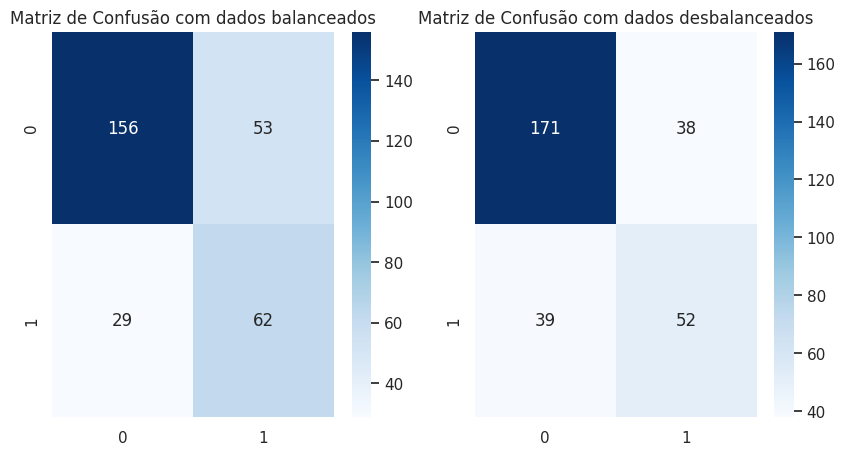

In [ ]:
# Matriz de Confusão
confusion_matrix(y_test, y_pred_balanceado)
confusion_matrix(y_test, y_pred_desbalanceado)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].set_title('Matriz de Confusão com dados balanceados')
ax[1].set_title('Matriz de Confusão com dados desbalanceados')

sns.heatmap(confusion_matrix(y_test, y_pred_balanceado), annot = True, fmt = 'd', cmap = 'Blues', ax = ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred_desbalanceado), annot = True, fmt = 'd', cmap = 'Blues', ax = ax[1])
plt.show()

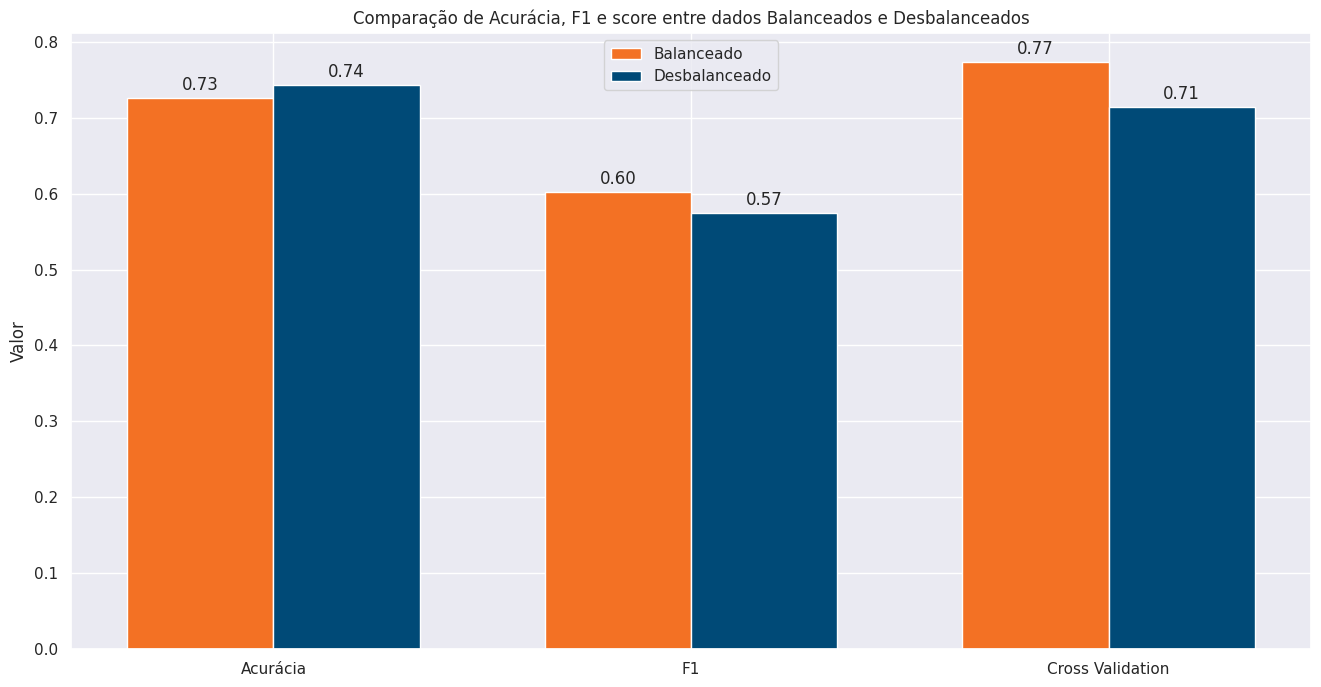

In [ ]:
# Guardando informações para o plot final
XGB = [accuracy_balanceado, f1_balanceado, scores.mean()]

# Dados para os gráficos
labels = ['Acurácia', 'F1','Cross Validation']
balanceado = [accuracy_balanceado, f1_balanceado, scores.mean()]
desbalanceado = [accuracy_desbalanceado, f1_desbalanceado, scores_desbalanceados.mean()]

# Configuração do gráfico
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, balanceado, width, label='Balanceado', color='#f37124')
bars2 = ax.bar(x + width/2, desbalanceado, width, label='Desbalanceado', color='#004a77')


# Labels e título
ax.set_ylabel('Valor')
ax.set_title('Comparação de Acurácia, F1 e score entre dados Balanceados e Desbalanceados')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Exibir os valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Exibir o gráfico
plt.show()

# Modelo RandomForest Classification

In [ ]:
"""
param_grid = {
    'n_estimators': [1000, 200, 500],
    'max_depth': [4, 8, 10],
    'max_samples': [0.6, 0.8, 0.9],
    'max_features': ["sqrt"],
    'min_samples_split': [3, 4, 6],
    'min_samples_leaf': [1],
    'random_state': [42]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# max_depth, learning_rate, n_estimators, subsample, colsample_bytree, random_state = grid_search.best_params_.values()


print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')
"""

'\nparam_grid = {\n    \'n_estimators\': [1000, 200, 500],\n    \'max_depth\': [4, 8, 10],\n    \'max_samples\': [0.6, 0.8, 0.9],\n    \'max_features\': ["sqrt"],\n    \'min_samples_split\': [3, 4, 6],\n    \'min_samples_leaf\': [1],\n    \'random_state\': [42]\n}\n\ngrid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring=\'accuracy\', n_jobs=-1)\ngrid_search.fit(X_train_resampled, y_train_resampled)\n\n# max_depth, learning_rate, n_estimators, subsample, colsample_bytree, random_state = grid_search.best_params_.values()\n\n\nprint(f\'Best Hyperparameters: {grid_search.best_params_}\')\nprint(f\'Best Cross-Validation Score: {grid_search.best_score_}\')\n'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    max_samples=0.9,
    max_features="sqrt",
    min_samples_split=6,
    min_samples_leaf=1,
    bootstrap=True,
    class_weight= 'balanced',
    random_state=42
)

In [ ]:
rf_model.fit(X_train_resampled, y_train_resampled) # This line is added to train the model

# Predict
y_pred_balanceado = rf_model.predict(X_test)

y_pred_balanceado.shape, y_test.shape

((300,), (300,))

In [ ]:
rf_model.fit(X_train, y_train) # This line is added to train the model

# Predict
y_pred_desbalanceado = rf_model.predict(X_test)

y_pred_desbalanceado.shape, y_test.shape

((300,), (300,))

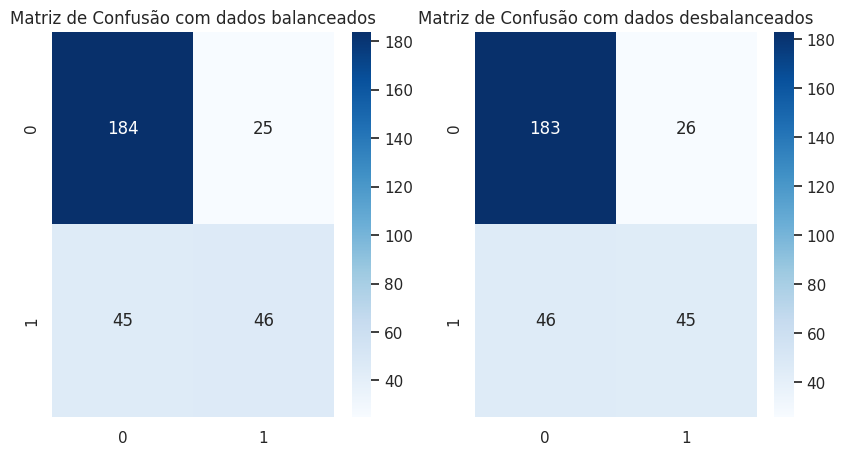

In [ ]:
# Matriz de Confusão
confusion_matrix(y_test, y_pred_balanceado)
confusion_matrix(y_test, y_pred_desbalanceado)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].set_title('Matriz de Confusão com dados balanceados')
ax[1].set_title('Matriz de Confusão com dados desbalanceados')

sns.heatmap(confusion_matrix(y_test, y_pred_balanceado), annot = True, fmt = 'd', cmap = 'Blues', ax = ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred_desbalanceado), annot = True, fmt = 'd', cmap = 'Blues', ax = ax[1])
plt.show()

In [ ]:
# Medir acuracia
accuracy_balanceado = accuracy_score(y_test, y_pred_balanceado)
f1_balanceado = f1_score(y_test, y_pred_balanceado)

accuracy_desbalanceado = accuracy_score(y_test, y_pred_desbalanceado)
f1_desbalanceado = f1_score(y_test, y_pred_desbalanceado)

In [ ]:
# Realizando a validação cruzada com o XGBoost utilizando dados balanceados (resampled)
scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print(f'Média de Acurácia com dados balanceados: {scores.mean()}')

# Se desejar, você pode ainda realizar a validação cruzada com os dados originais (desbalanceados)
scores_desbalanceados = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print(f'Média de Acurácia com dados desbalanceados: {scores_desbalanceados.mean()}')

Média de Acurácia com dados balanceados: 0.8193329015544041
Média de Acurácia com dados desbalanceados: 0.75


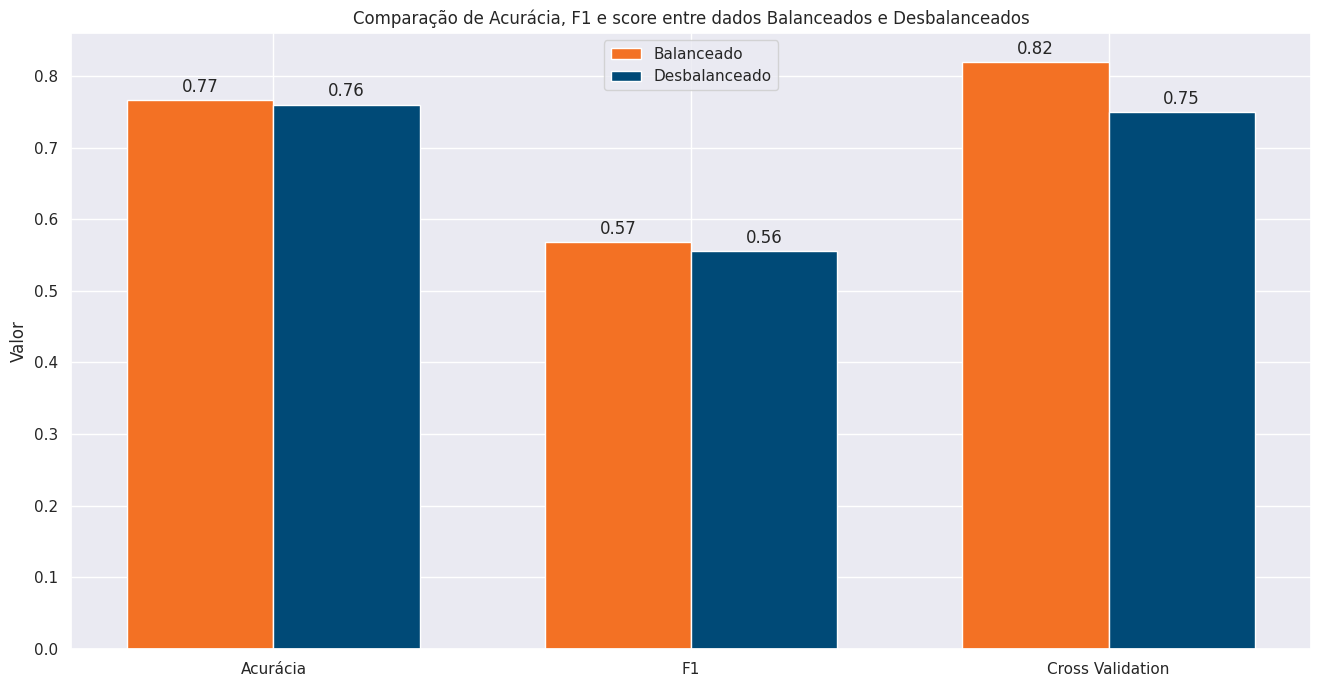

In [ ]:
# Dados para os gráficos
labels = ['Acurácia', 'F1','Cross Validation']
balanceado = [accuracy_balanceado, f1_balanceado, scores.mean()]
desbalanceado = [accuracy_desbalanceado, f1_desbalanceado, scores_desbalanceados.mean()]

# Configuração do gráfico
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, balanceado, width, label='Balanceado', color='#f37124')
bars2 = ax.bar(x + width/2, desbalanceado, width, label='Desbalanceado', color='#004a77')


# Labels e título
ax.set_ylabel('Valor')
ax.set_title('Comparação de Acurácia, F1 e score entre dados Balanceados e Desbalanceados')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Exibir os valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Exibir o gráfico
plt.show()

# Comparando os dois modelos com os dados balanceados

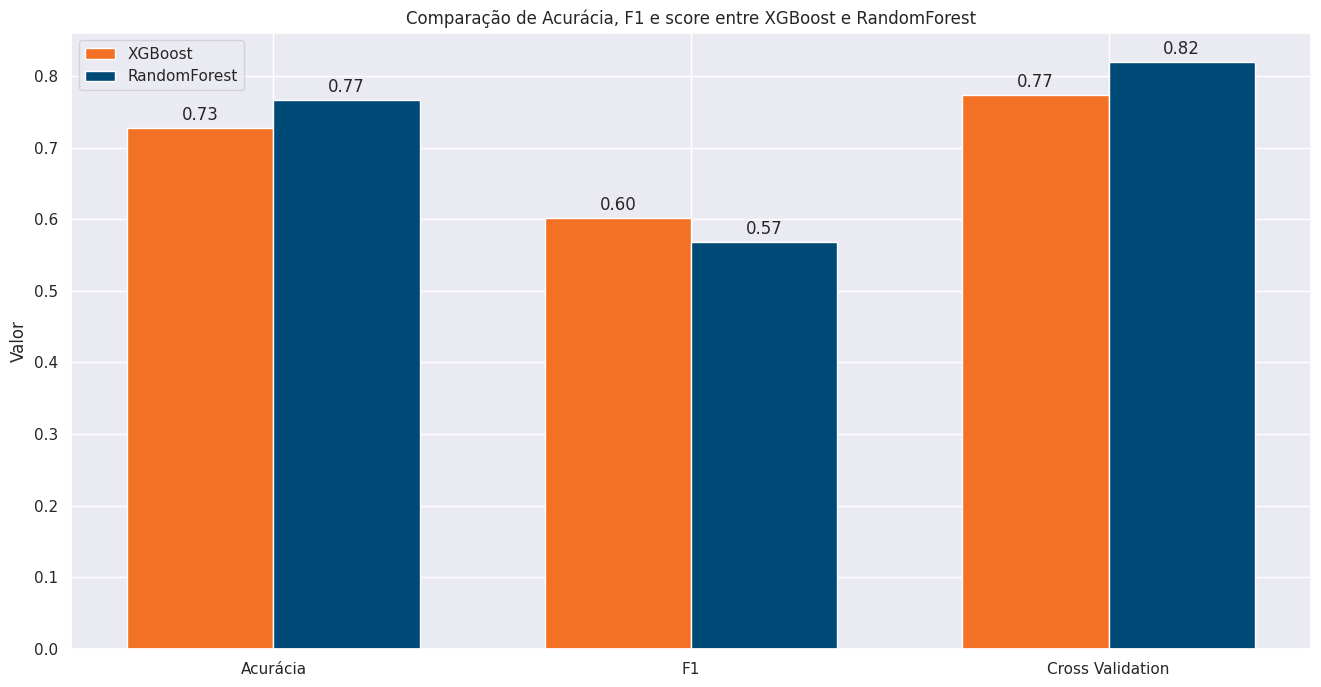

In [ ]:
# Dados para os gráficos
labels = ['Acurácia', 'F1','Cross Validation']

RF = [accuracy_balanceado, f1_balanceado, scores.mean()]

# Configuração do gráfico
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, XGB, width, label='XGBoost', color='#f37124')
bars2 = ax.bar(x + width/2, RF, width, label='RandomForest', color='#004a77')


# Labels e título
ax.set_ylabel('Valor')
ax.set_title('Comparação de Acurácia, F1 e score entre XGBoost e RandomForest')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Exibir os valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Exibir o gráfico
plt.show()

In [ ]:
# Utilizando o Recall para metrica
from sklearn.metrics import recall_score

recall_XGB = recall_score(y_test, y_pred_balanceado)
recall_RF = recall_score(y_test, y_pred_desbalanceado)

print(f'Recall do modelo XGBoost com dados balanceados: {recall_XGB}')
print(f'Recall do modelo RandomForest com dados balanceados: {recall_RF}')



Recall do modelo XGBoost com dados balanceados: 0.5054945054945055
Recall do modelo RandomForest com dados balanceados: 0.4945054945054945


***Plotar a Precision-Recall Curve***

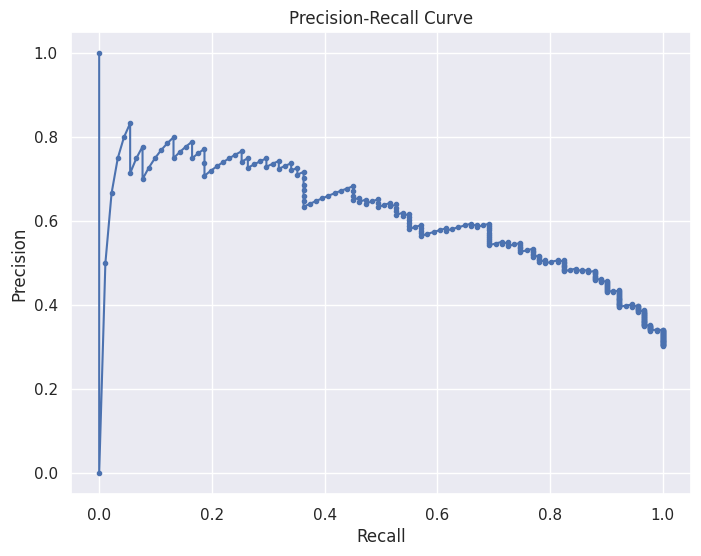

In [ ]:
from sklearn.metrics import precision_recall_curve

y_probs = rf_model.predict_proba(X_test)[:, 1]


precision, recall, thresholds = precision_recall_curve(y_test, y_probs)


plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', color='b', label='Precision-Recall Curve Random Forest')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

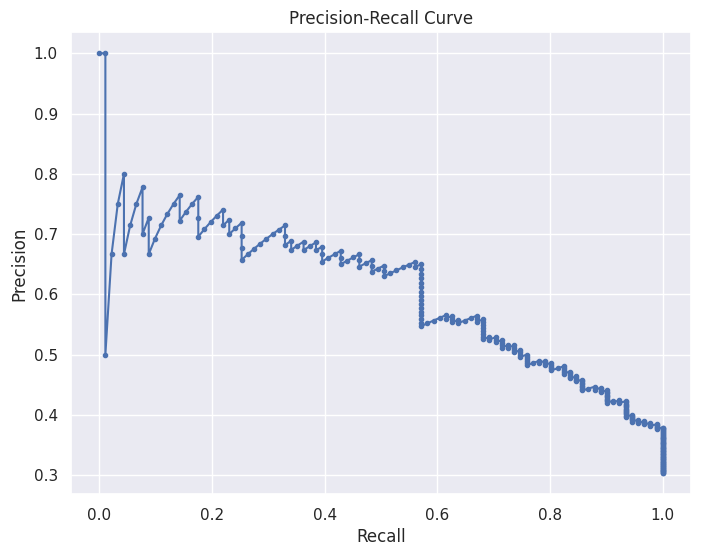

In [ ]:
# 3. Obter probabilidades preditas
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# 4. Calcular Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# 5. Plotar a Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', color='b', label='Precision-Recall Curve xgboost')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# ***Baseline Model Performance: Accuracy***

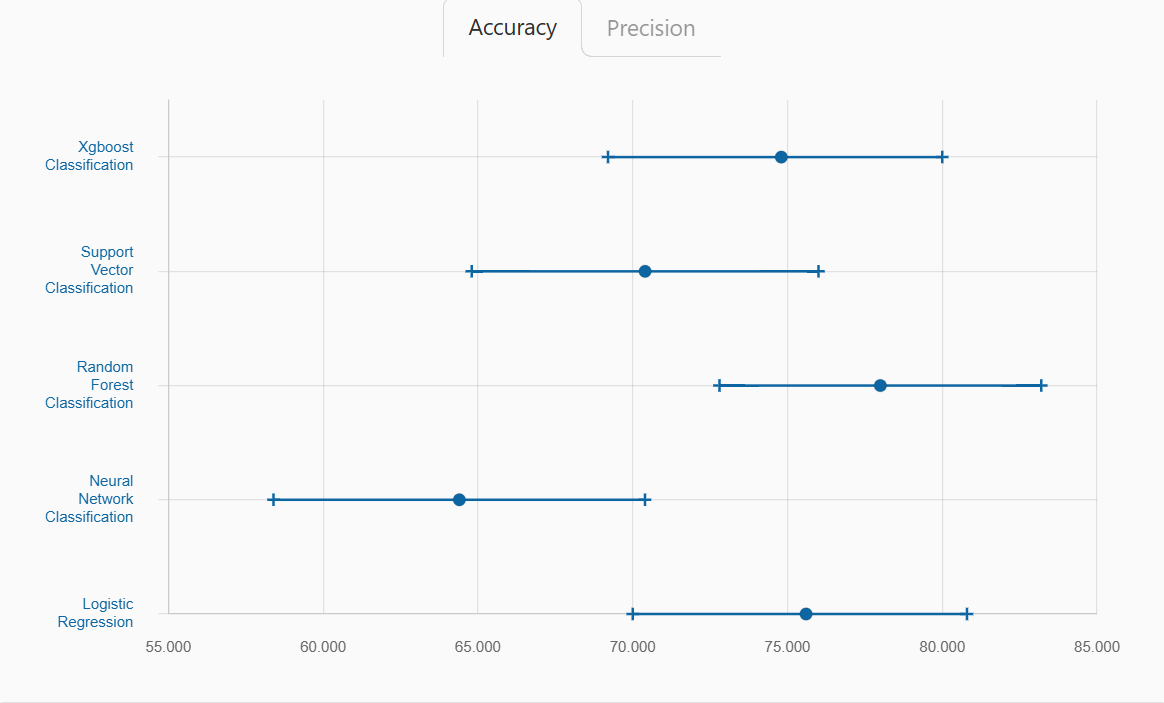

# ***Baseline Model Performance: Precision***

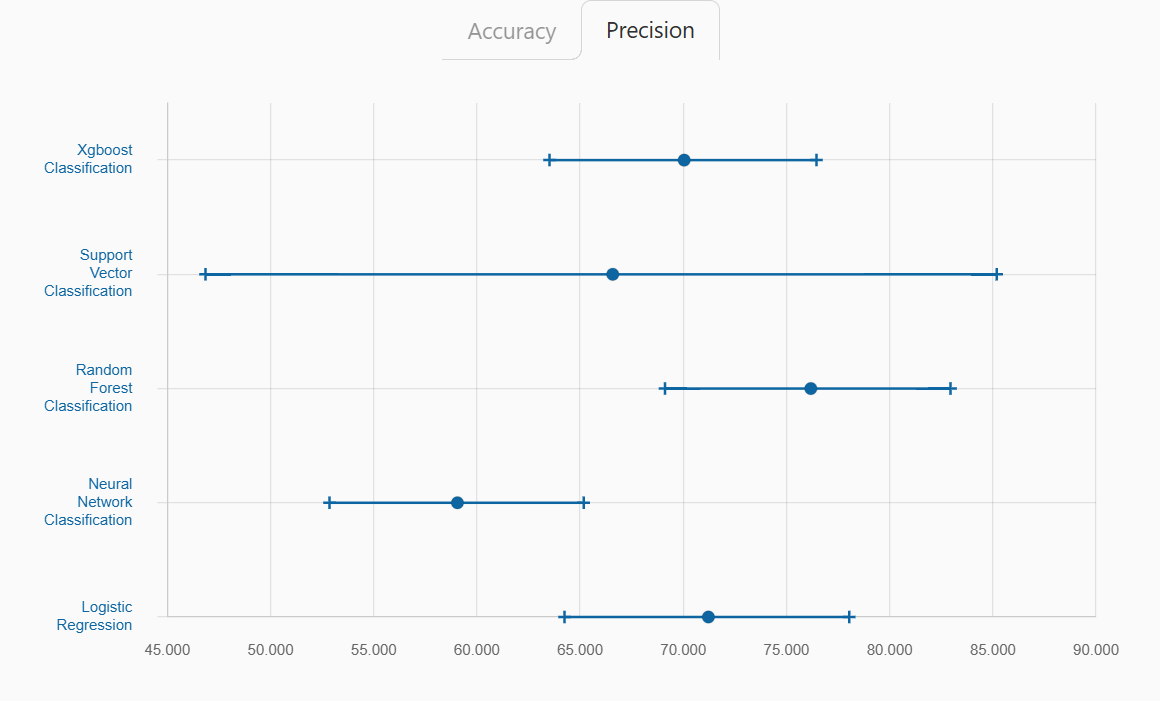